###  热度最高的hashtag词云
   - 选用数据集中'entities_hashtags_text'一项，统计出现的词条以及出现次数，以词云的形式展示。轮廓选用的是twitter的logo（小蓝鸟）。</br>
   - 因为词条数目较多，为了在显示出较清晰轮廓的同时不显得过分杂乱，在录入数据时只选取了前100条（实际显示会少于100个）。将鼠标移动到词条上可以显示具体的出现次数。</br>
   - 在统计中发现#HourOfCode的出现次数（765次）远多于其他词条，因此在运行时，偶尔会出现HourOfCode这一项不出现的情况，可能需要多刷新几次。

In [1]:
from PIL import Image
from pyecharts import options as opts
from pyecharts.charts import WordCloud

In [2]:
f1=open('第一次个人作业数据集.csv','r',encoding='ANSI')
line_list1=f1.readlines()
htlist=[]
for line in line_list1:
    line=line.split(',') #每一行为一个列表
    l=line[10].split() #每一行的第十个值为hashtag合集，以空格分割
    htlist.append(l) #写入linelist
f1.close()
del htlist[0] #删去首行表头

#hashtag计数
hashtag_dict={}
for line in htlist:
    for l in line:
        if l in hashtag_dict.keys():
            hashtag_dict[l]+=1
        else:
            hashtag_dict[l]=1
hashtag_list=list(hashtag_dict.items())
hashtag_list.sort(key=lambda x:x[1], reverse=True) #按照出现次数排序

#将结果写入csv文件
outf=open('hashtag_count.csv','w',encoding='utf-8')
for i in range(len(hashtag_list)):
    hashtag,count=hashtag_list[i]
    outf.write(hashtag+','+'%d'%(count)+'\n')
outf.close()

#将词条统计文件的数据导入元组中
srcf=open('hashtag_count.csv','r',encoding='utf-8')
llist = srcf.readlines()  #返回列表，文件中的一行是一个元素
srcf.close()

cnt_list = []  #用于保存元组(关键词,出现次数)
for line in llist[0:100]: #录入热度前一百的hashtags
    line = line.strip()  #删除'\n'
    line_split = line.split(',') # 以逗号作为标志，把字符串切分成词，存为列表
    cnt_list.append((line_split[0],line_split[1]))
# 将读入的每行数据拆分成元组

#生成词云
cloud = WordCloud()
# 向词云中添加内容
cloud.add('', cnt_list, word_size_range=[10, 50], mask_image='twitter.jpeg') #限定词的大小,设置形状
cloud.set_global_opts(title_opts=opts.TitleOpts(title="hashtags 词频统计")) #设置标题

# render生成notebook文件
cloud.render('hashtagscnt.html')

'C:\\Users\\Lenovo\\Desktop\\数据可视化\\个人作业\\个人作业1\\hashtagscnt.html'

### 每小时热度前十的hashtags变化timeline
   - 统计周一到周五每天的hashtags出现次数，对前十的hashtags做timeline展示，直观看到每一天的变化。
   - 从timeline中可以看出，每天前三名的hashtags都没有变化，第四的“coding”也很稳定，只在周二那天降至第八位。以timeline展示变化可以引起关注，进一步探索为什么在这一天出现特别的情况。
   - 不过由于样本量小，即便是单日量不足五条的hashtags，也有可能进入前十，因此稍显贫瘠。

In [3]:
import pandas as pd
import sqlite3
import csv
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline, Grid
from pyecharts.globals import ThemeType

In [5]:
# 连接数据库 建表
with sqlite3.connect('tweet.db') as db:
    cursor=db.cursor()
cursor.execute('drop table if exists hashtag')
cursor.execute('create table if not exists hashtag(\
                id integer, \
                ht text, \
                count integer, \
                time text)')
db.commit()

# 接入数据，创建周一到周五五个hashtags列表
f2=open('第一次个人作业数据集.csv','r',encoding='ANSI')
line_list2=f2.readlines()
linelist1=[]
linelist2=[]
linelist3=[]
linelist4=[]
linelist5=[]
for line in line_list2:
    line=line.split(',') # 每个单元格为一个列表
    # 不同日期的hashtags，以空格分割，放入对应的列表
    if line[3]=='Fri Jan 08':
        l=line[10].split()
        linelist5.append(l)
    elif line[3]=='Thu Jan 07':
        l=line[10].split()
        linelist4.append(l)
    elif line[3]=='Wed Jan 06':
        l=line[10].split()
        linelist3.append(l)
    elif line[3]=='Tue Jan 05':
        l=line[10].split()
        linelist2.append(l)
    elif line[3]=='Mon Jan 04':
        l=line[10].split()
        linelist1.append(l)
    else:
        pass
f2.close()

In [7]:
# 分别计算每天的hashtags出现次数，排序
hashtag_dict1={}
for line in linelist1:
    for l in line:
        if l in hashtag_dict1.keys():
            hashtag_dict1[l]+=1
        else:
            hashtag_dict1[l]=1
hashtag_list1=list(hashtag_dict1.items())
hashtag_list1.sort(key=lambda x:x[1], reverse=True)

hashtag_dict2={}
for line in linelist2:
    for l in line:
        if l in hashtag_dict2.keys():
            hashtag_dict2[l]+=1
        else:
            hashtag_dict2[l]=1
hashtag_list2=list(hashtag_dict2.items())
hashtag_list2.sort(key=lambda x:x[1], reverse=True)
    
hashtag_dict3={}
for line in linelist3:
    for l in line:
        if l in hashtag_dict3.keys():
            hashtag_dict3[l]+=1
        else:
            hashtag_dict3[l]=1
hashtag_list3=list(hashtag_dict3.items())
hashtag_list3.sort(key=lambda x:x[1], reverse=True)
    
hashtag_dict4={}
for line in linelist4:
    for l in line:
        if l in hashtag_dict4.keys():
            hashtag_dict4[l]+=1
        else:
            hashtag_dict4[l]=1
hashtag_list4=list(hashtag_dict4.items())
hashtag_list4.sort(key=lambda x:x[1], reverse=True)
    
hashtag_dict5={}
for line in linelist5:
    for l in line:
        if l in hashtag_dict5.keys():
            hashtag_dict5[l]+=1
        else:
            hashtag_dict5[l]=1
hashtag_list5=list(hashtag_dict5.items())
hashtag_list5.sort(key=lambda x:x[1], reverse=True)

# 将id、hashtag名、出现次数、日期写入csv文件
outf2=open('hashtag_count_timeline.csv','w',encoding='utf-8')
for i in range(len(hashtag_list1)):
    hashtag,count=hashtag_list1[i]
    outf2.write('%d'%(i+1)+','+hashtag+','+'%d'%(count)+','+'Mon'+'\n')
for i in range(len(hashtag_list2)):
    hashtag,count=hashtag_list2[i]
    outf2.write('%d'%(i+1)+','+hashtag+','+'%d'%(count)+','+'Tue'+'\n')
for i in range(len(hashtag_list3)):
    hashtag,count=hashtag_list3[i]
    outf2.write('%d'%(i+1)+','+hashtag+','+'%d'%(count)+','+'Wed'+'\n')
for i in range(len(hashtag_list4)):
    hashtag,count=hashtag_list4[i]
    outf2.write('%d'%(i+1)+','+hashtag+','+'%d'%(count)+','+'Thu'+'\n')
for i in range(len(hashtag_list5)):
    hashtag,count=hashtag_list5[i]
    outf2.write('%d'%(i+1)+','+hashtag+','+'%d'%(count)+','+'Fri'+'\n')
outf2.close()

# 将数据写入数据库hashtag表格中
cursor.execute('delete from hashtag')
db.commit()
csv_file=csv.reader(open('hashtag_count_timeline.csv','r',encoding='utf-8'))
for line in csv_file:
    cursor.execute('insert into hashtag values(?,?,?,?)',line)
cursor.execute('delete from hashtag where id > 10') #删去十名以外的hashtags
db.commit()

# 画图
def draw_timeline():
    df=pd.read_sql_query('SELECT * FROM hashtag', db) #用pandas接入表格数据
    t=Timeline({'theme': ThemeType.MACARONS}) #设置主题
    
    for i in range(len(df)):
        if i==0 or i%10==0: #每天的第一个数据
            bar=(
                Bar(
                    init_opts=opts.InitOpts(width='500px',height='1000px') #设置图像大小
                )
                .add_xaxis(list(df.loc[i:i+9,'ht'][::-1]))
                .add_yaxis(
                    '出现频率',
                    list(df.loc[i:i+9,'count'][::-1]),
                    itemstyle_opts=opts.ItemStyleOpts(color='#87CEFF')
                ) #柱体样式
                .set_global_opts(
                    title_opts=opts.TitleOpts(
                        title=df.loc[i, 'time'],
                        pos_right='5%',
                        pos_bottom='15%',
                        title_textstyle_opts=opts.TextStyleOpts(
                            font_size=15,
                            color='#9F79EE' #右下角日期标签
                        ),
                        subtitle='当日高频hashtags前十'
                    ),
                    xaxis_opts=opts.AxisOpts(
                        splitline_opts=opts.LineStyleOpts(is_show=True,opacity=1),
                        axislabel_opts=opts.LabelOpts(color='6A5ACD'),
                    ),
                    yaxis_opts=opts.AxisOpts(
                        splitline_opts=opts.LineStyleOpts(is_show=True, opacity=1), # y轴分割线配置
                        axislabel_opts=opts.LabelOpts(color='#6A5ACD'), # y轴标签颜色设置
                    ) #坐标轴样式
                )
                .set_series_opts(
                    label_opts=opts.LabelOpts(position='right',color='#6495ED')
                )
                .reversal_axis() #坐标轴翻转
            )
            grid=(
                Grid()
                .add(bar, grid_opts=opts.GridOpts(pos_left='15%',pos_top='15%'))
            ) #图像位置
        else:
            continue
        t.add(grid, '{}'.format(df.loc[i, 'time'])) #根据时间组合多个图像
    t.add_schema(
        play_interval=1000, # 播放速度/间隔
        is_auto_play=True, # 自动播放
        is_loop_play=True, # 循环播放
        is_timeline_show=True, # 显示timeline组件
        itemstyle_opts=opts.ItemStyleOpts(color='#9F79EE') # timeline颜色
    )
    return t.render('hashtagtimeline.html')

draw_timeline()

'C:\\Users\\Lenovo\\Desktop\\数据可视化\\个人作业\\个人作业1\\hashtagtimeline.html'

### 发帖语言统计饼图
   - 选用数据中“lang”一项，统计不同语言的出现次数，将出现次数大于10的语言在饼图中呈现，其他语言则合并为“else”项。
   - 因为在所有语言中，“en”占据绝对的比例，用百分比显示可能不如直接显示数值清晰，故将显示数转换为实际数值。饼图的颜色也选择了饱和度低的颜色，看起来更加舒适。
   - 虽然数据记录的多是和coding相关帖子，但也可以映射出整体的用户使用情况。即twitter上使用英语的用户最多，其他语言的分布或许也可以参考该图。

In [9]:
import matplotlib.pyplot as plt

f3=open('第一次个人作业数据集.csv','r',encoding='ANSI')
line_list3=f3.readlines()
langlist=[]
for line in line_list3:
    line=line.split(',') #每一行为一个列表
    l=line[6].split() #提取每一行的lang数据
    langlist.append(l) #写入linelist
f3.close()
del langlist[0] #删去首行表头

#lang计数
lang_dict={}
for lang in langlist:
    for l in lang:
        if l in lang_dict.keys():
            lang_dict[l]+=1
        else:
            lang_dict[l]=1
lang_list=[]
for k in lang_dict.keys():
    lang_list.append([k,lang_dict[k]]) #以列表形式写入
lang_list.sort(key=lambda x:x[1], reverse=True) #按照出现次数排序

count=0 #“else”项的频率
remove_list=[] 
#准备将出现次数小于10的语言合并为其他项，去除原始数据
for i in lang_list:
    if i[1]<10:
        count+=i[1]
        remove_list.append(i)
    else:
        continue
lang_list.append(['else',count])
output_list=[i for i in lang_list if i not in remove_list] #生成最终的列表

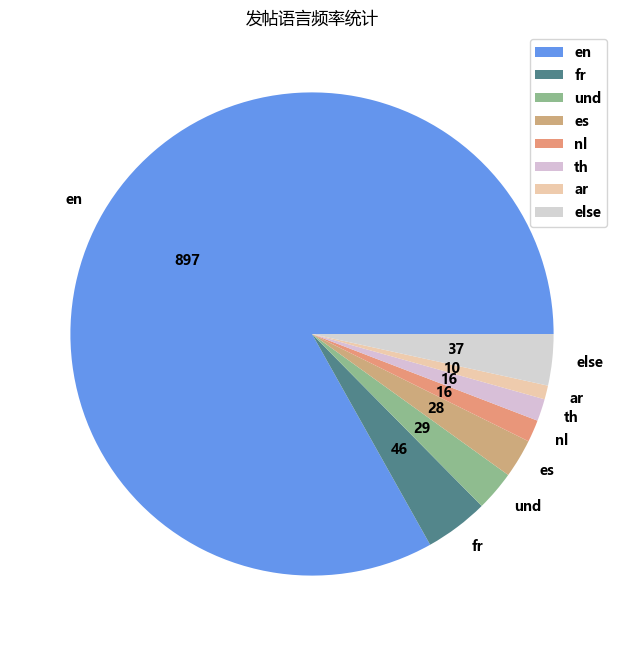

In [10]:
lang=[] #语言列表
count=[] #频率列表
total=0
for i in output_list:
    lang.append(i[0])
    count.append(i[1])
    total+=i[1]

plt.rc('font',family='MicroSoft YaHei',weight='bold') #导入中文字体
plt.figure(figsize=(20, 8), dpi=100)# 创建画布
# 绘制饼图
plt.pie(count, labels=lang, autopct=lambda x: '{:.0f}'.format(x*total/100), colors=['#6495ED','#53868B','#8FBC8F','#CDAA7D','#E9967A','#D8BFD8','#EECBAD','#D4D4D4']) #显示数值、设置颜色
plt.legend()
plt.title("发帖语言频率统计")# 添加标题
plt.savefig('langcnt.jpg')
plt.show()# 显示图像

### 不同时段发帖数变化曲线
   - 以小时为单位，统计从1月4日到1月8日每一个小时的发帖数量，以一天24小时做为横轴，比较这五天的曲线，看是否存在规律。
   - 从图表可以看出，平均每天的发帖高峰时间段为15时至20时，在周五的凌晨3点多曾出现一周中的最高峰（可能是周末来临的狂欢），而周一的清晨6点多也有一次小高峰（可能是工作日来临前回光返照）。
   - 由于一天中有24小时，全部排列显得有些紧凑，网格线看起来可能也过多，但是也是因为刻度多，网格线的存在使观察更加清晰（可以双击放大图片，缓解过于紧凑的视觉感受）。

In [11]:
import matplotlib.pyplot as plt

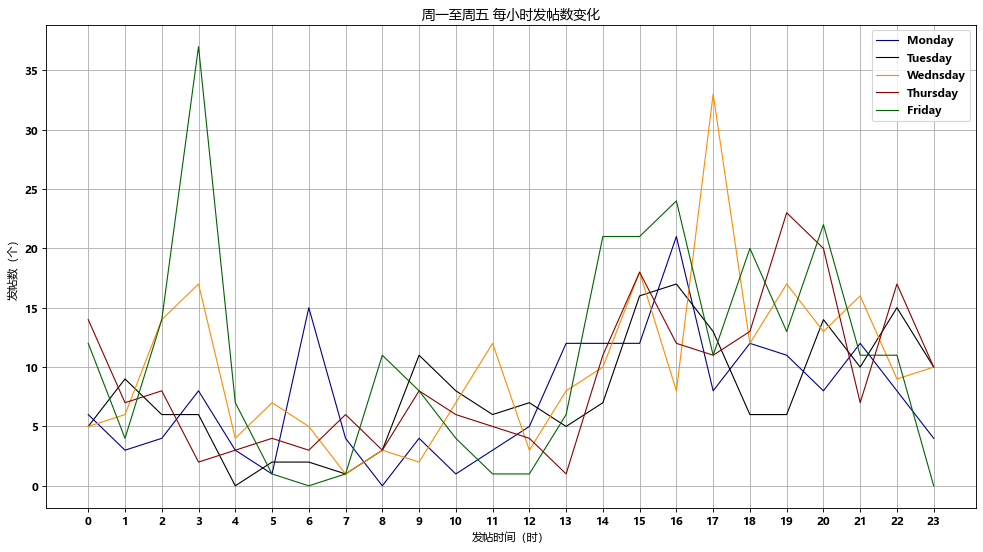

In [12]:
#打开数据集，导入数据
f4=open('第一次个人作业数据集.csv','r',encoding='ANSI')
line_list4=f4.readlines()
#创建五天的计数列表
Monlist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Tuelist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Wedlist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Thulist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Frilist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

#根据created_at__date列匹配，created_at__time列的%h部分计数
for line in line_list4:
    line=line.split(',') #每一行为一个列表
    if line[3]=='Fri Jan 08':
        l=line[4].split(':') #用：分割时间，仅计算小时部分
        Frilist[int(l[0])]+=1
    elif line[3]=='Thu Jan 07':
        l=line[4].split(':')
        Thulist[int(l[0])]+=1
    elif line[3]=='Wed Jan 06':
        l=line[4].split(':')
        Wedlist[int(l[0])]+=1
    elif line[3]=='Tue Jan 05':
        l=line[4].split(':')
        Tuelist[int(l[0])]+=1
    elif line[3]=='Mon Jan 04':
        l=line[4].split(':')
        Monlist[int(l[0])]+=1
    else: #跳过表头
        pass
f4.close() #关闭文件

#设置时间为x轴
times=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

#生成折线图
plt.rc('font',family='MicroSoft YaHei',weight='bold') #导入中文字体
fig=plt.figure(figsize=(15,8), dpi=80) #生成视图
ax=fig.add_subplot(1,1,1) #组合图表
ax.set_title('周一至周五 每小时发帖数变化') #设置图表标题
ax.set_xlabel('发帖时间（时）') #x轴标签
ax.set_ylabel('发帖数（个）') #y轴标签

#设置每一条折线参数
ax.plot(times, Monlist, color='darkblue', linewidth=1.0, linestyle='-', label='Monday')
ax.plot(times, Tuelist, color='black', linewidth=1.0, linestyle='-', label='Tuesday')
ax.plot(times, Wedlist, color='darkorange', linewidth=1.0, linestyle='-', label='Wednsday')
ax.plot(times, Thulist, color='darkred', linewidth=1.0, linestyle='-', label='Thursday')
ax.plot(times, Frilist, color='darkgreen', linewidth=1.0, linestyle='-', label='Friday')

ax.legend(loc = "best")#显示每一条折现的标签
ax.grid(True)#显示网格线
plt.savefig('twinum.jpg')

### 英文原创帖的点赞转推数 散点分布图
   - 选取lang项为“en”、点赞转推数都大于0的帖子，根据发帖的日期生成五张表，分别用点状、星星图案标记AM、PM的数据，以点赞数作为x轴数值、转推数作为y轴数值，绘制散点分布图。
   - 从图表中可以看出，发帖时段在“PM”的帖子数量更多，和上图的发帖数变化曲线相对应；“PM”的帖子综合点赞转推数也更高（即分布在图表右上方），且周一最为显著。
   - 由于数据样本小，且点赞转推数普遍不高，因此重合的情况多。且五个分布图放在一起，长宽相同，但横纵坐标尺不同，对比不够明显。

In [13]:
import sqlite3

# 连接数据库 建表complex；设置点赞数、转推数、时段（早/晚）、星期四栏
with sqlite3.connect('tweet.db') as db:
    cursor=db.cursor()
cursor.execute('drop table if exists complex')
cursor.execute('create table if not exists complex(\
                favorite_count integer, \
                retweet_count integer, \
                time text, \
                day text)')
db.commit()

f5=open('第一次个人作业数据集.csv','r',encoding='ANSI')
line_list5=f5.readlines()
list5=[] #准备空列表
for line in line_list5:
    line=line.split(',') #每一行为一个列表
    day=line[3].split() #以空格分割日期
    time=line[4].split(':') #以：分割时间
    lang=line[6].split() #以空格分隔，得到完整的语言数据
    fav=line[7].split() #以空格分隔，得到完整的点赞数
    ret=line[8].split() #以空格分隔，得到完整的转推数
    # 对于使用英语，且点赞转推数都大于0的原创帖子，根据时段分类，写入列表
    if 'en' in lang and int(time[0])>12 and int(fav[0])>0 and int(ret[0])>0:
        list5.append([int(fav[0]),int(ret[0]),'PM',day[0]])
    elif 'en' in lang and int(time[0])<=12 and int(fav[0])>0 and int(ret[0])>0:
        list5.append([int(fav[0]),int(ret[0]),'AM',day[0]])
f5.close()

#将数据写入表格
cursor.execute('delete from complex')
db.commit()
for line in list5:
    cursor.execute('insert into complex values(?,?,?,?)',line)
db.commit()

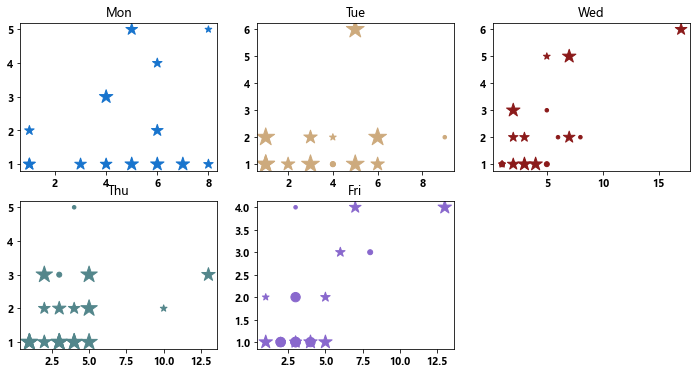

In [15]:
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter

#准备不同星期、时段各自的点赞和转推空列表
MonAM_fav,MonAM_ret=[],[]
TueAM_fav,TueAM_ret=[],[]
WedAM_fav,WedAM_ret=[],[]
ThuAM_fav,ThuAM_ret=[],[]
FriAM_fav,FriAM_ret=[],[]
MonPM_fav,MonPM_ret=[],[]
TuePM_fav,TuePM_ret=[],[]
WedPM_fav,WedPM_ret=[],[]
ThuPM_fav,ThuPM_ret=[],[]
FriPM_fav,FriPM_ret=[],[]

df=pd.read_sql_query('select * from complex', db) #用pandas连接complex表格
#将点赞和转推数据根据星期和时段分类，写入对应的列表
for i in range(len(df)):
    if df.loc[i,'day']=='Mon':
        if df.loc[i,'time']=='AM':
            MonAM_fav.append(df.loc[i,'favorite_count'])
            MonAM_ret.append(df.loc[i,'retweet_count'])
        elif df.loc[i,'time']=='PM':
            MonPM_fav.append(df.loc[i,'favorite_count'])
            MonPM_ret.append(df.loc[i,'retweet_count'])
    elif df.loc[i,'day']=='Tue':
        if df.loc[i,'time']=='AM':
            TueAM_fav.append(df.loc[i,'favorite_count'])
            TueAM_ret.append(df.loc[i,'retweet_count'])
        elif df.loc[i,'time']=='PM':
            TuePM_fav.append(df.loc[i,'favorite_count'])
            TuePM_ret.append(df.loc[i,'retweet_count'])
    elif df.loc[i,'day']=='Wed':
        if df.loc[i,'time']=='AM':
            WedAM_fav.append(df.loc[i,'favorite_count'])
            WedAM_ret.append(df.loc[i,'retweet_count'])
        elif df.loc[i,'time']=='PM':
            WedPM_fav.append(df.loc[i,'favorite_count'])
            WedPM_ret.append(df.loc[i,'retweet_count'])
    elif df.loc[i,'day']=='Thu':
        if df.loc[i,'time']=='AM':
            ThuAM_fav.append(df.loc[i,'favorite_count'])
            ThuAM_ret.append(df.loc[i,'retweet_count'])
        elif df.loc[i,'time']=='PM':
            ThuPM_fav.append(df.loc[i,'favorite_count'])
            ThuPM_ret.append(df.loc[i,'retweet_count'])
    elif df.loc[i,'day']=='Fri':
        if df.loc[i,'time']=='AM':
            FriAM_fav.append(df.loc[i,'favorite_count'])
            FriAM_ret.append(df.loc[i,'retweet_count'])
        elif df.loc[i,'time']=='PM':
            FriPM_fav.append(df.loc[i,'favorite_count'])
            FriPM_ret.append(df.loc[i,'retweet_count'])

# 根据点的重复次数，改变散点的大小，即随着重复次数增加变大
size1 = [50*i for i in Counter(MonAM_fav).values() for j in range(i)]
size2 = [50*i for i in Counter(MonPM_fav).values() for j in range(i)]
size3 = [50*i for i in Counter(TueAM_fav).values() for j in range(i)]
size4 = [50*i for i in Counter(TuePM_fav).values() for j in range(i)]
size5 = [50*i for i in Counter(WedAM_fav).values() for j in range(i)]
size6 = [50*i for i in Counter(WedPM_fav).values() for j in range(i)]
size7 = [50*i for i in Counter(ThuAM_fav).values() for j in range(i)]
size8 = [50*i for i in Counter(ThuPM_fav).values() for j in range(i)]
size9 = [50*i for i in Counter(FriAM_fav).values() for j in range(i)]
size10 = [50*i for i in Counter(FriPM_fav).values() for j in range(i)]

# 在一个画布中显示五张图表
fig = plt.figure(figsize=(12,6)) #生成一个空的绘图窗口
ax1 = fig.add_subplot(2, 3, 1) #设置图表位置
ax2 = fig.add_subplot(2, 3, 2) 
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
# 五张图表分别对应周一到周五的数据
ax1.set_title('Mon')
ax2.set_title('Tue')
ax3.set_title('Wed')
ax4.set_title('Thu')
ax5.set_title('Fri')

#以点赞数作为x轴数值，转推数为y轴数值，每天的数据设置为不同的颜色，上午数据的形状设置为点、下午数据的形状设置为星星
ax1.scatter(MonAM_fav,MonAM_ret,c='#1874CD',marker='.',s=size1)
ax1.scatter(MonPM_fav,MonPM_ret,c='#1874CD',marker='*',s=size2)

ax2.scatter(TueAM_fav,TueAM_ret,c='#CDAA7D',marker='.',s=size3)
ax2.scatter(TuePM_fav,TuePM_ret,c='#CDAA7D',marker='*',s=size4)

ax3.scatter(WedAM_fav,WedAM_ret,c='#8B1A1A',marker='.',s=size5)
ax3.scatter(WedPM_fav,WedPM_ret,c='#8B1A1A',marker='*',s=size6)

ax4.scatter(ThuAM_fav,ThuAM_ret,c='#53868B',marker='.',s=size7)
ax4.scatter(ThuPM_fav,ThuPM_ret,c='#53868B',marker='*',s=size8)

ax5.scatter(FriAM_fav,FriAM_ret,c='#8968CD',marker='.',s=size9)
ax5.scatter(FriPM_fav,FriPM_ret,c='#8968CD',marker='*',s=size10)

plt.savefig('scatter.jpg')